## 3. 无重复字符的最长子串

给定一个字符串 s ，请你找出其中不含有重复字符的 最长 子串 的长度。

核心思路：采用滑动窗口思想，用左右指针维护一个不包含重复字符的区间，并通过哈希集合实时记录窗口内已出现的字符；当右指针加入的新字符发生重复时，持续移动左指针并删除对应字符，直到窗口重新满足“无重复”的条件，同时在遍历过程中更新窗口的最大长度

In [7]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        max_len = 0
        hashtable = set()
        l = 0
        for r, ch in enumerate(s):
            while ch in hashtable:
                hashtable.remove(s[l])
                l += 1
            hashtable.add(ch)
            max_len = max(max_len, r-l+1)
        return max_len
str1 = "abcabcbb"
print(Solution().lengthOfLongestSubstring(str1))

3


复杂度分析

由于每个字符最多被加入和移除集合各一次，整体仅进行一次线性扫描，时间复杂度为 O(n)；哈希集合中最多存放不重复字符，空间占用与字符集大小或字符串长度成正比，故空间复杂度为 O(n)

---

## 438. 找到字符串中所有字母异位词

给定两个字符串 s 和 p，找到 s 中所有 p 的 异位词 的子串，返回这些子串的起始索引。不考虑答案输出的顺序。
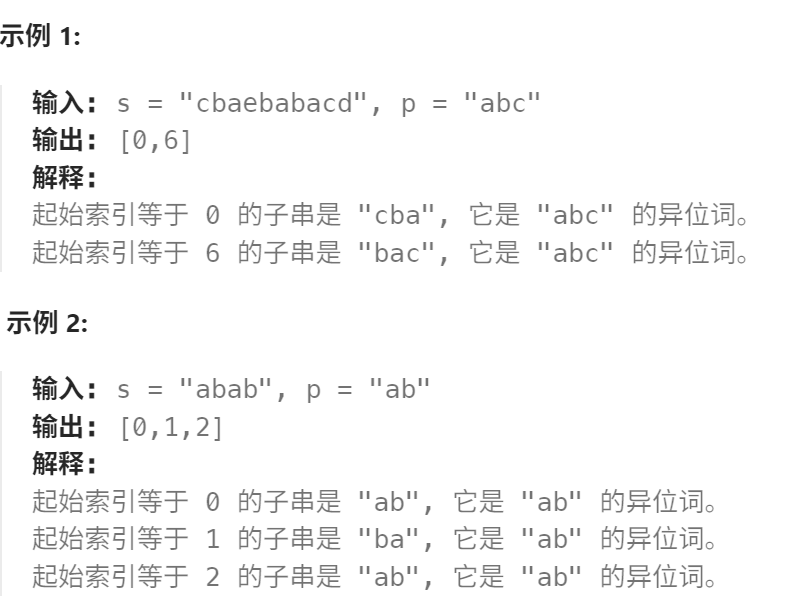

核心思路：

因为字符串 p 的异位词的长度一定与字符串 p 的长度相同，所以我们可以在字符串 s 中构造一个长度为与字符串 p 的长度相同的滑动窗口，并在滑动中维护窗口中每种字母的数量；当窗口中每种字母的数量与字符串 p 中每种字母的数量相同时，则说明当前窗口为字符串 p 的异位词。


In [8]:
from typing import List
class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        n, m = len(s), len(p)
        if n < m:
            return []
        # target统计字符串 p 中每个字母的数量，window统计s滑动窗口中每个字母的数量
        target = [0] * 26
        window = [0] * 26
        ans = []

        # 初始化target和window,其中window先统计s的前m个字符，如果初始化相等，则直接将索引0加入结果
        for ch in p:
            target[ord(ch) - 97] += 1
        for ch in range(m) :
            window[ord(s[ch])-  97] += 1
        if target == window:
            ans.append(0)

        # 从s的第m个字符开始滑动窗口，每次移动都更新window中对应字母的数量
        for right_ch in range(m, n):
            # 左侧滑动窗口的索引为right_ch - m，右侧滑动窗口的索引为right_ch，相差m个位置
            left_ch = right_ch - m
            # 更新window中对应字母的数量，左侧滑动窗口的字母数量减1，右侧滑动窗口的字母数量加1
            window[ord(s[left_ch]) - 97] -= 1
            window[ord(s[right_ch]) - 97] += 1

            # 若更新后的window与target相等，则将更新后的窗口的起始索引left_ch + 1加入结果
            if target == window:
                ans.append(left_ch + 1)

        return ans
str1 = "cbaebabacd"
str2 = "abc"
print(Solution().findAnagrams(str1, str2))

[0, 6]


**复杂度分析：**

该算法基于固定长度的滑动窗口。首先对字符串 `p` 和 `s` 的前 m 个字符进行一次统计初始化，时间复杂度为 O(m)；随后窗口在字符串 `s` 上从左到右滑动，每次滑动只涉及常数次字符计数的增减操作，并比较两个长度为 26 的计数数组。由于窗口一共滑动 n−m 次，且每次比较数组的代价为 O(26)，可视为常数，因此整体**时间复杂度为 O(n)**，其中 n 是字符串 `s` 的长度。

空间复杂度方面，算法使用了两个长度固定为 26 的计数数组 `target` 和 `window`，以及结果列表 `ans`。计数数组占用常数空间，结果列表在最坏情况下可能存储 O(n) 个索引。因此，**额外空间复杂度为 O(n)**（若不计输出结果，仅辅助空间为 O(1)）。

---